In [1]:
# import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('code_survey.csv', dtype={'age':'str', 'experience': 'str', 'gender': 'str'})
df.head()

,year,age,experience,salary,sql,javascript,css,c#,java,php,...,wordpress,ios,lamp,mongodb,cloud,.net,react.js,typescript,swift,bash
0,2011,< 20,<2,Student / Unemployed,0,1,0.0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2011,25-29,41310,NaN,1,0,0.0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011,25-29,41435,NaN,1,1,0.0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011,< 20,41310,Student / Unemployed,0,0,0.0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011,35-39,11,"$80,000 - $100,000",1,1,1.0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# convert salary to category
salary_order = ['Student / Unemployed', 
                'Less than $20,000', 
                '$20,000 - $40,000', 
                '$40,000 - $60,000', 
                '$60,000 - $80,000', 
                '$80,000 - $100,000', 
                '$100,000 - $120,000',
                '$120,000 - $140,000',
                'More than $140,000']
salary_type = pd.api.types.CategoricalDtype(salary_order, ordered=True)
df.salary = df.salary.astype(salary_type)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347687 entries, 0 to 347686
Data columns (total 33 columns):
year           347687 non-null int64
age            250815 non-null object
experience     292946 non-null object
salary         236899 non-null category
sql            347687 non-null int64
javascript     347687 non-null int64
css            107911 non-null float64
c#             347687 non-null int64
java           347687 non-null int64
php            347687 non-null int64
c              258804 non-null float64
c++            347687 non-null int64
python         347687 non-null int64
ruby           77833 non-null float64
perl           9056 non-null float64
html           193981 non-null float64
objective-c    23628 non-null float64
jquery         98625 non-null float64
node.js        338631 non-null float64
gender         273598 non-null object
sql server     82116 non-null float64
android        82116 non-null float64
angular.js     321246 non-null float64
wordpress      26

In [5]:
non_tech_cols = ['year', 'age', 'experience', 'salary', 'gender']

## Data Analysis

In [6]:
# look at numbers for languages on a yearly basis as a proportion of total
# Note: total proportion will be > 1 as there are more than one responses by a single respondent
df_tech = df.groupby('year').agg(['mean'])
df_tech.columns = df_tech.columns.get_level_values(0)

In [7]:
# find the top 10 languages in every year
df_tech.head()

,sql,javascript,css,c#,java,php,c,c++,python,ruby,...,wordpress,ios,lamp,mongodb,cloud,.net,react.js,typescript,swift,bash
year,,,,,,,,,,,,,,,,,,,,,
2011,0.573409,0.504444,0.482048,0.480626,0.306079,0.280128,0.263420,0.263064,0.204408,0.101315,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012,0.527631,0.500881,0.452347,0.395323,0.376101,0.308345,0.237706,0.244434,0.193817,0.092424,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,0.471464,0.486040,NaN,0.310716,0.309998,0.238555,0.147403,0.174092,0.192979,0.081503,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014,0.453618,0.494963,NaN,0.311134,0.324349,0.223734,0.153605,0.185529,0.192725,0.077587,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015,0.361842,0.458560,NaN,0.266388,0.315073,0.250288,0.138465,0.173618,0.200797,NaN,...,0.076938,0.074983,0.073833,NaN,NaN,NaN,NaN,NaN,NaN,NaN


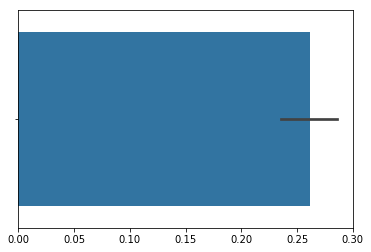

In [8]:
sns.barplot(data=df_tech, x=df_tech.columns)